In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
filecsv = "/content/house_data.csv"
df = pd.read_csv(filecsv, usecols=['bedrooms','bathrooms','sqft_living','grade','price','yr_built'])


In [5]:
df.head()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900,3,1.00,1180,7,1955
1,538000,3,2.25,2570,7,1951
2,180000,2,1.00,770,6,1933
3,604000,4,3.00,1960,7,1965
4,510000,3,2.00,1680,8,1987


Penjelasan setiap kolom :


1. bedrooms adalah Jumlah kamar tidur 
2. bathrooms adalah jumlah kamar mandi
3. sqft_living adalah luas rumah dengan ukuran sqft
4. grade adalah Grade system dari pemerintah King Country US
5. yr_built adalah tahun bangunan dibangun.








In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  int64  
 1   bedrooms     21613 non-null  int64  
 2   bathrooms    21613 non-null  float64
 3   sqft_living  21613 non-null  int64  
 4   grade        21613 non-null  int64  
 5   yr_built     21613 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 1013.2 KB


setelah melihat informasi yang terdapat pada data diatas, sekarang kita lanjut akan mengubah nilai float(pecahan) yang terdapat pada kolom bathrooms menjadi bilangan bulat(int).

In [11]:
# mengubah tipe data float menjadi int di kolom bathrooms
df['bathrooms'] = df['bathrooms'].astype('int')
# df.head()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900,3,1,1180,7,1955
1,538000,3,2,2570,7,1951
2,180000,2,1,770,6,1933
3,604000,4,3,1960,7,1965
4,510000,3,2,1680,8,1987


In [12]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,1.749734,2079.899736,7.656873,1971.005136
std,3.671272e+05,0.930062,0.734873,918.440897,1.175459,29.373411
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,1900.000000
25%,3.219500e+05,3.000000,1.000000,1427.000000,7.000000,1951.000000
50%,4.500000e+05,3.000000,2.000000,1910.000000,7.000000,1975.000000
75%,6.450000e+05,4.000000,2.000000,2550.000000,8.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,13.000000,2015.000000


pada feature bedroooms terdapat nilai 33, maybe karena typo. saya ubah jadi 3

In [16]:
# mengganti nilai 33 menjadi 3
df['bedrooms'] = df['bedrooms'].replace(33,3)

In [17]:
df.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
grade          0
yr_built       0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


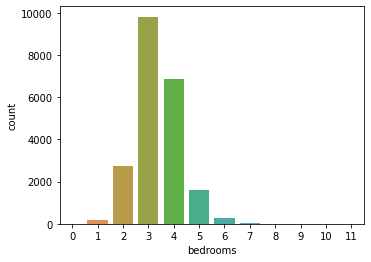

In [18]:
# melihat distribusi dari bedrooms
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['bedrooms'])

plt.show()

dapat dilihat bahwa sebagian besar jumlah kamar diangka 3 dan 4.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


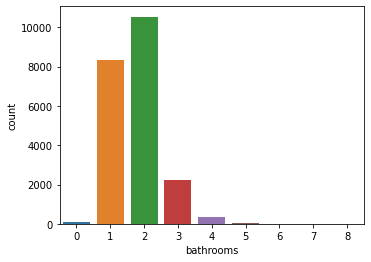

In [19]:
# melihat distribusi dari bathrooms
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['bathrooms'])

plt.show()



*  jumlah kamar mandi paling banyak berada diangka 1 dan 2.





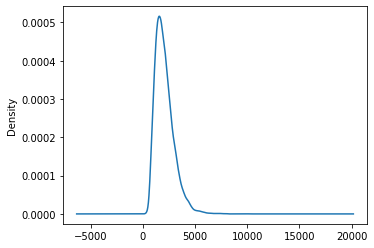

In [22]:
# melihat distribusi dari bedrooms
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['sqft_living'].plot(kind='kde')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


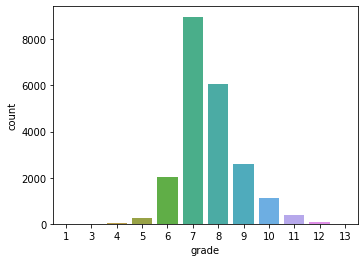

In [23]:
# melihat distribusi dari grade
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['grade'])

plt.show()



* Sebagian besar rumah di County King US memiliki grade 7 dan 8.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


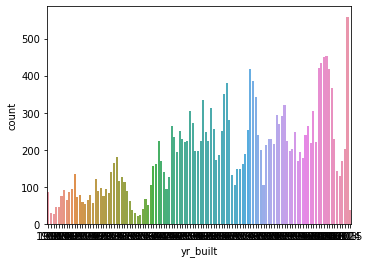

In [24]:
# melihat distribusi dari yr_built
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['yr_built'])

plt.show()

In [25]:
df.corr().style.background_gradient().set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  """Entry point for launching an IPython kernel.


,price,bedrooms,bathrooms,sqft_living,grade,yr_built
price,1.00,0.32,0.51,0.70,0.67,0.05
bedrooms,0.32,1.00,0.48,0.59,0.37,0.16
bathrooms,0.51,0.48,1.00,0.70,0.61,0.43
sqft_living,0.70,0.59,0.70,1.00,0.76,0.32
grade,0.67,0.37,0.61,0.76,1.00,0.45
yr_built,0.05,0.16,0.43,0.32,0.45,1.00




*  Dari tabel korelasi diatas, dapat dilihat bahwa sqft_living mempunyai hubangan linear positif yang sangat kuat dengan price.




In [26]:
df.head()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900,3,1,1180,7,1955
1,538000,3,2,2570,7,1951
2,180000,2,1,770,6,1933
3,604000,4,3,1960,7,1965
4,510000,3,2,1680,8,1987


In [27]:
# Pertama, buat variable x dan y
x = df.drop(columns='price')
y = df['price']

In [28]:
# Kedua, kita split data kita menjadi training dan testing dengan porsi 80:20
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=4)

In [29]:
# Cek shape data training dan testing
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(17290, 5)
(17290,)
(4323, 5)
(4323,)


In [30]:
# Ketiga, kita bikin object linear regresi
lin_reg = LinearRegression()

In [31]:
# Keempat, train the model menggunakan training data yang sudah displit
lin_reg.fit(x_train, y_train)

LinearRegression()

In [32]:
# Kelima,cari tau nilai slope/koefisien (m) dan intercept(b)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[-53061.75464279  64658.55790617    188.90926343 131290.89536823
  -3969.55831454]
7031568.245717696


In [33]:
# Kita coba buat kedalam dataframe agar lebih rapi
coef_dict = {
    'features':x.columns,
    'coef_value':lin_reg.coef_
}
coef =pd.DataFrame(coef_dict,columns=['features','coef_value'])
coef

,features,coef_value
0,bedrooms,-53061.754643
1,bathrooms,64658.557906
2,sqft_living,188.909263
3,grade,131290.895368
4,yr_built,-3969.558315


In [ ]:
y_pred = lin_reg.predict(x_test)

In [34]:
lin_reg.score(x_test, y_test)

0.61251132869411